In [15]:
!pip install torch diffusers transformers accelerate safetensors pillow matplotlib


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Model loaded on: cuda
Enter your image prompt: Astronaut walking on Mars with futuristic city in background, cinematic lighting
Generating image...


  0%|          | 0/30 [00:00<?, ?it/s]

Image saved as generated_image.png


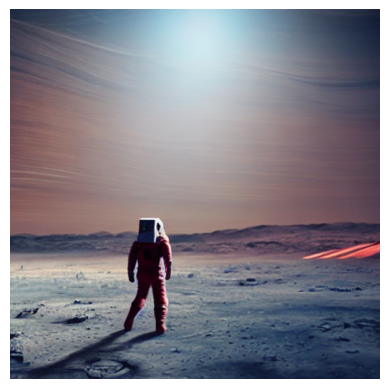

In [16]:
import torch
from diffusers import StableDiffusionPipeline
from PIL import Image
import matplotlib.pyplot as plt

# -----------------------------
# 1. Load Pre-trained Model
# -----------------------------
model_id = "runwayml/stable-diffusion-v1-5"

device = "cuda" if torch.cuda.is_available() else "cpu"

pipe = StableDiffusionPipeline.from_pretrained(
    model_id,
    torch_dtype=torch.float16 if device == "cuda" else torch.float32
)

pipe = pipe.to(device)

print("Model loaded on:", device)

# -----------------------------
# 2. Take prompt from user
# -----------------------------
prompt = input("Enter your image prompt: ")

# -----------------------------
# 3. Generate Image
# -----------------------------
print("Generating image...")

image = pipe(
    prompt=prompt,
    guidance_scale=8.5,
    num_inference_steps=30
).images[0]

# -----------------------------
# 4. Save Output
# -----------------------------
image.save("generated_image.png")
print("Image saved as generated_image.png")

# -----------------------------
# 5. Show image
# -----------------------------
plt.imshow(image)
plt.axis("off")
plt.show()
